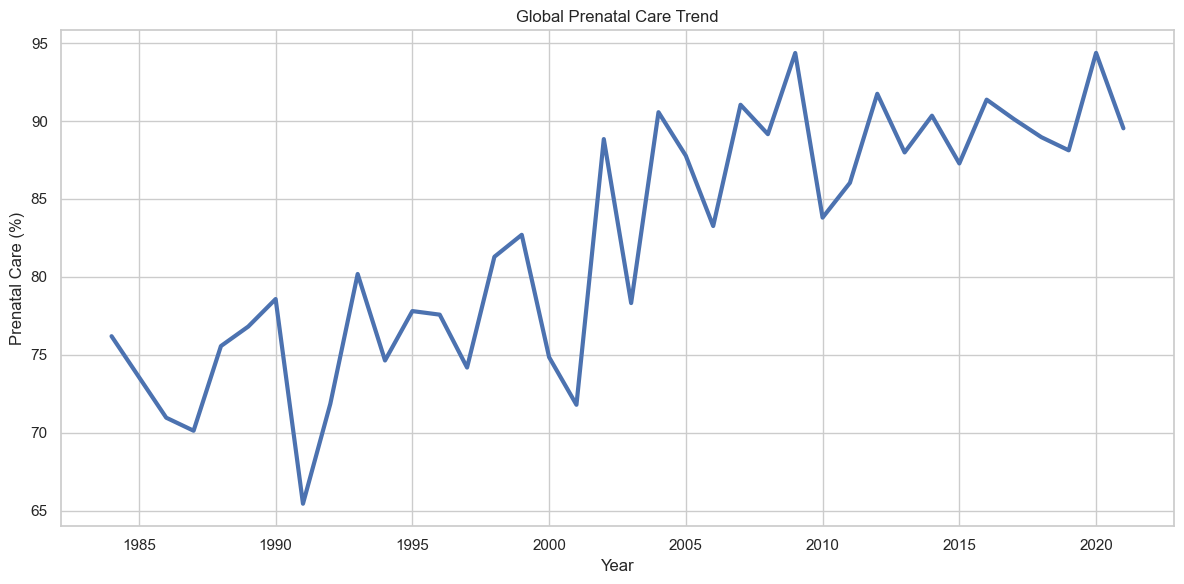

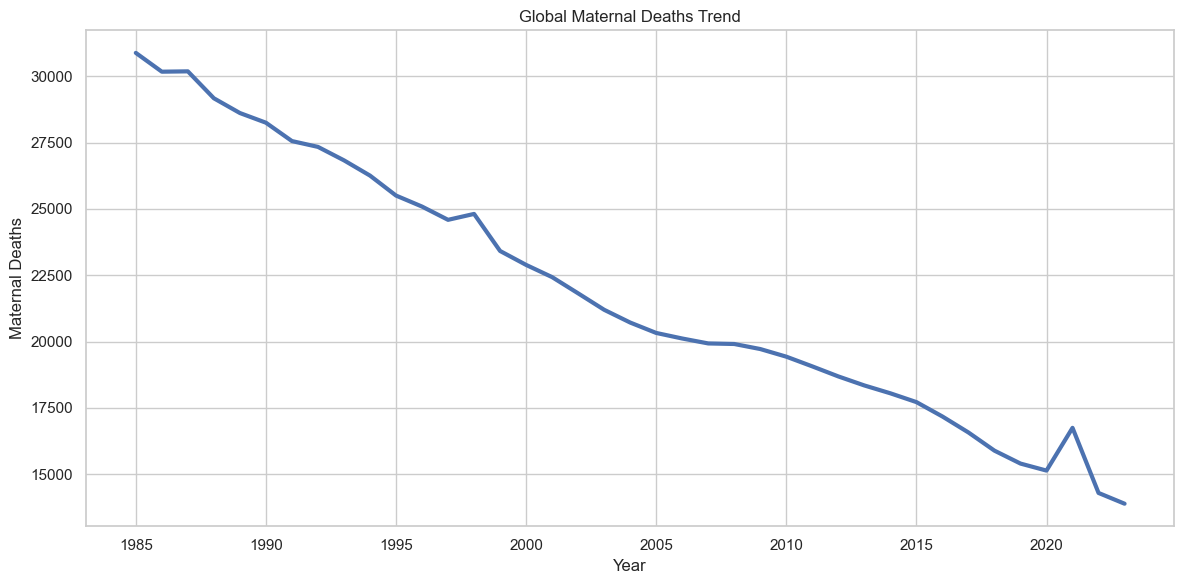

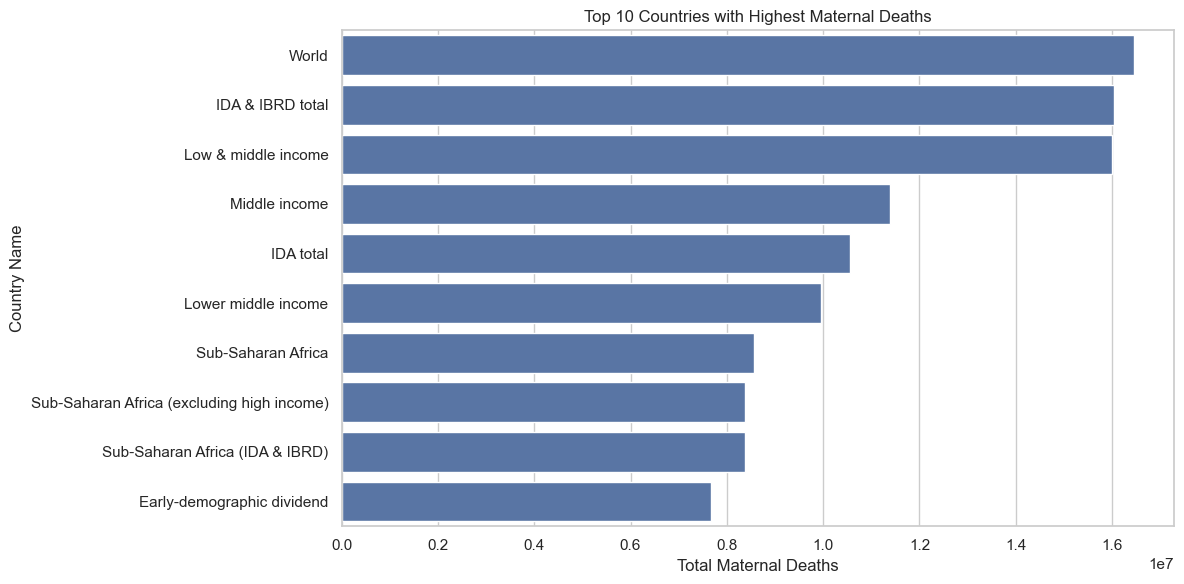

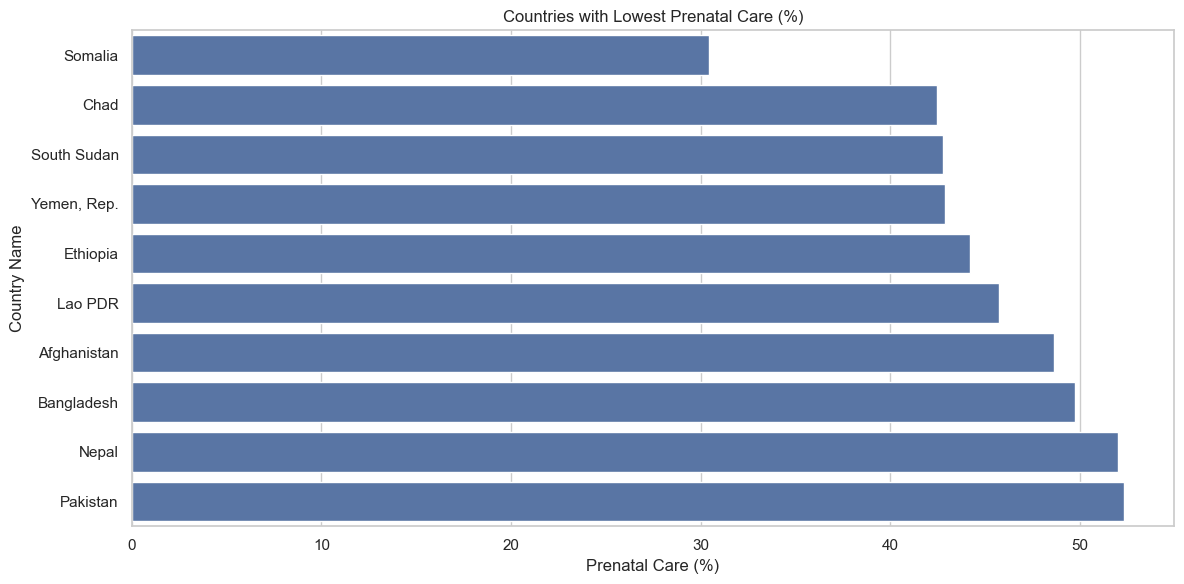

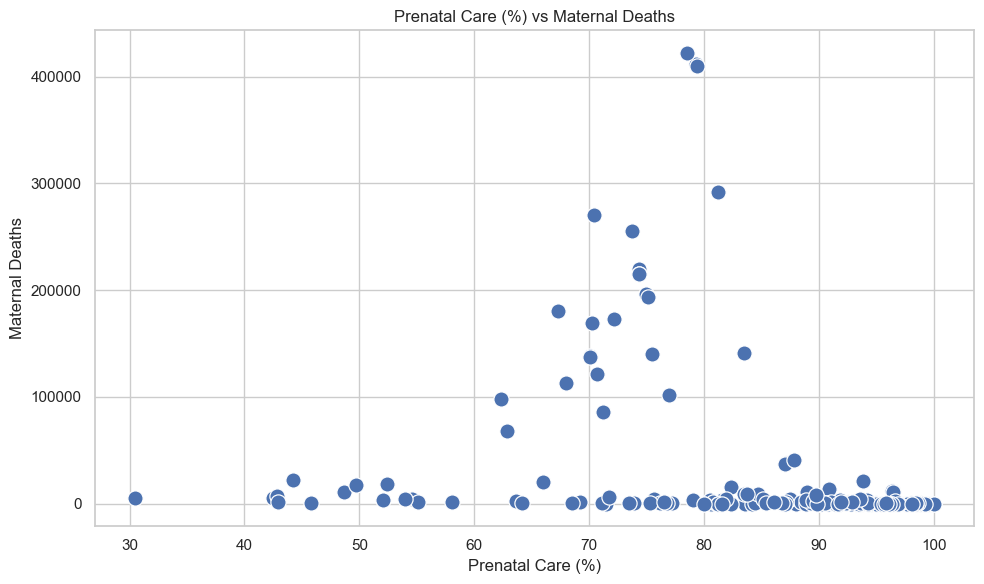

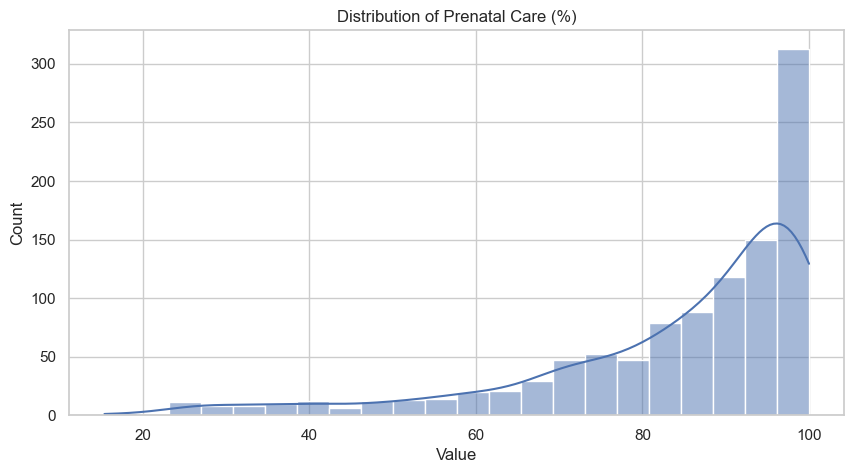

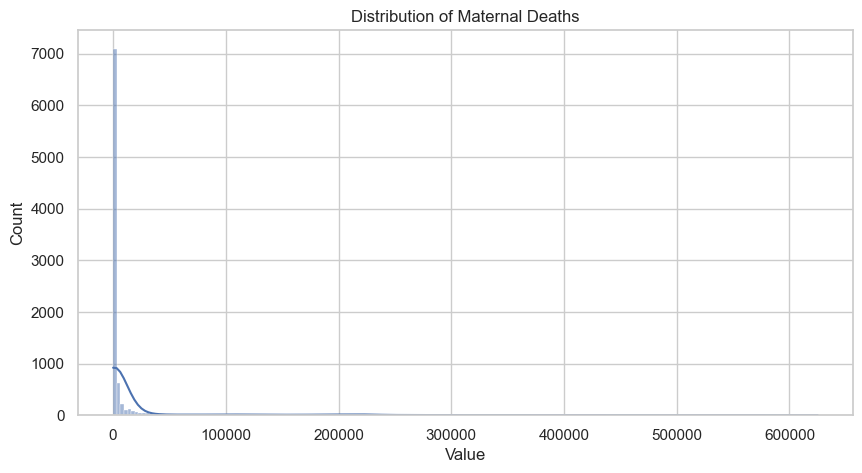

In [1]:
# ---------------------------------------------------------
# GLOBAL MATERNAL HEALTH DATASET EDA NOTEBOOK
# ---------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ---------------------------------------------------------
# 1. LOAD DATASETS
# ---------------------------------------------------------

prenatal = pd.read_csv("globaldataset_Prenatalcare.csv")
maternal = pd.read_csv("Global_MaternalDeath.csv")

# ---------------------------------------------------------
# 2. CLEANING (drop unnecessary columns)
# ---------------------------------------------------------

prenatal = prenatal.drop(columns=["Disaggregation"], errors="ignore")
maternal = maternal.drop(columns=["Disaggregation"], errors="ignore")

# ---------------------------------------------------------
# 3. PRENATAL CARE TREND VS MATERNAL DEATH TREND
# ---------------------------------------------------------

prenatal_trend = prenatal.groupby("Year")["Value"].mean().reset_index()
maternal_trend = maternal.groupby("Year")["Value"].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(prenatal_trend["Year"], prenatal_trend["Value"], linewidth=3)
plt.title("Global Prenatal Care Trend")
plt.xlabel("Year")
plt.ylabel("Prenatal Care (%)")
plt.tight_layout()
plt.savefig("global_prenatal_trend.png")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(maternal_trend["Year"], maternal_trend["Value"], linewidth=3)
plt.title("Global Maternal Deaths Trend")
plt.xlabel("Year")
plt.ylabel("Maternal Deaths")
plt.tight_layout()
plt.savefig("global_maternal_deaths.png")
plt.show()

# ---------------------------------------------------------
# 4. TOP 10 COUNTRIES WITH HIGHEST MATERNAL DEATHS
# ---------------------------------------------------------

top_countries = (
    maternal.groupby("Country Name")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Highest Maternal Deaths")
plt.xlabel("Total Maternal Deaths")
plt.tight_layout()
plt.savefig("top10_maternal_deaths.png")
plt.show()

# ---------------------------------------------------------
# 5. COUNTRIES WITH LOWEST PRENATAL CARE COVERAGE
# ---------------------------------------------------------

low_prenatal = (
    prenatal.groupby("Country Name")["Value"]
    .mean()
    .sort_values()
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x=low_prenatal.values, y=low_prenatal.index)
plt.title("Countries with Lowest Prenatal Care (%)")
plt.xlabel("Prenatal Care (%)")
plt.tight_layout()
plt.savefig("lowest_prenatal_care.png")
plt.show()

# ---------------------------------------------------------
# 6. PRENATAL CARE VS MATERNAL DEATHS (MERGED SCATTER)
# ---------------------------------------------------------

merged = pd.merge(
    prenatal.groupby("Country Name")["Value"].mean(),
    maternal.groupby("Country Name")["Value"].mean(),
    left_index=True,
    right_index=True,
    how="inner",
)
merged.columns = ["Prenatal_Care", "Maternal_Deaths"]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Prenatal_Care",
    y="Maternal_Deaths",
    data=merged,
    s=120,
)
plt.title("Prenatal Care (%) vs Maternal Deaths")
plt.xlabel("Prenatal Care (%)")
plt.ylabel("Maternal Deaths")
plt.tight_layout()
plt.savefig("prenatal_vs_deaths.png")
plt.show()

# ---------------------------------------------------------
# 7. DISTRIBUTION PLOTS
# ---------------------------------------------------------

plt.figure(figsize=(10,5))
sns.histplot(prenatal["Value"], kde=True)
plt.title("Distribution of Prenatal Care (%)")
plt.savefig("dist_prenatal.png")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(maternal["Value"], kde=True)
plt.title("Distribution of Maternal Deaths")
plt.savefig("dist_maternal.png")
plt.show()

# ---------------------------------------------------------
# END OF NOTEBOOK
# ---------------------------------------------------------
